-----------cv.python-----------
巴氏举例：0.38528158801，相关性：0.808718997802，卡方：3247480.13383
(512, 512, 3)
(512, 512, 3)


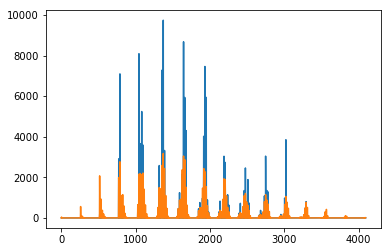

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def create_rgb_hist(image):
    h,w,c = image.shape
    # 下面是直方图初始化，初始化为空。这里创建为16*16*16
    # 因为直方图空间取值范围和总的取值范围不一样，binsize = 256/16 = 16个bins
    # 所以blue，red，green都分别有16个bins。后面的1就是一列
    # 这里16*16*16变成了正方体空间/正方形
    # 这里必须用float32,不能用int，会出错
    rgbHist = np.zeros([16*16*16, 1], np.float32)  
    bsize = 256/16
    for row in range(h):
        for col in range(w):
            b = image[row, col, 0]
            g = image[row, col, 1]
            r = image[row, col, 2]
            # 出现在哪个里面就加一,一定要转为整数，不能为浮点数。因为是index  
            # 我们降维将256降到16，在哪里出现一次就加一
            # 然后矩阵中的行索引就是各个像素加权值
            # 然后索引中矩阵的值就是统计出来它出现的次数
            index = np.int(b/bsize)*16*16 + np.int(g/bsize)*16 + np.int(r/bsize)
            rgbHist[np.int(index), 0] = rgbHist[np.int(index), 0] + 1
    return rgbHist

def hist_compare(image1, image2):
    hist1 = create_rgb_hist(image1)
    hist2 = create_rgb_hist(image2)
    # 使用巴氏距离，越小越相似
    match1 = cv.compareHist(hist1, hist2, cv.HISTCMP_BHATTACHARYYA)
    # 相似性,相关性越大越相似
    match2 = cv.compareHist(hist1, hist2, cv.HISTCMP_CORREL)
    # 卡方，越大越不相似
    match3 = cv.compareHist(hist1, hist2, cv.HISTCMP_CHISQR)
    print("巴氏举例：%s，相关性：%s，卡方：%s"%(match1,match2,match3))
    
print("-----------cv.python-----------")
image1 = cv.imread("/home/anaconda/桌面/自学OpenCV/src/image/lena.jpg")
image2 = cv.imread("/home/anaconda/桌面/自学OpenCV/src/image/lena_gaussian_noise.jpg")


cv.namedWindow("input image", cv.WINDOW_AUTOSIZE)
cv.imshow("original image1", image1)
cv.imshow("original image2", image2)

hist_compare(image1,image2)

print(image1.shape)
print(image2.shape)

plt.plot(create_rgb_hist(image1))
plt.plot(create_rgb_hist(image2))

cv.waitKey(0)
cv.destroyAllWindows()